In [2]:
import pandas as pd

# Load the dataset
dataset_path = 'stroke-data-cleaned.csv'
dataframe = pd.read_csv(dataset_path)
df = dataframe.copy
# Show the first few rows of the dataset
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
encodedvalue = LabelEncoder()
encoded_df = encodedvalue.copy
# Identify the categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Perform label encoding on each categorical column
encoded_df = df.copy()
for col in categorical_columns:
    encoded_df[col] = encodedvalue.fit_transform(df[col].astype(str))

# Show the first few rows of the encoded dataset
encoded_df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1


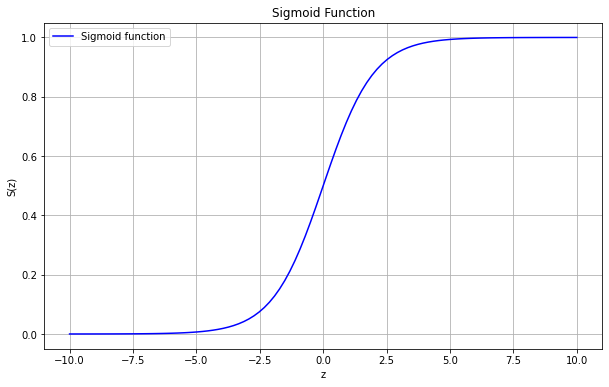

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoidfunction(z):
    return 1 / (1 + np.exp(-z))

# Values for z
z = np.linspace(-10, 10, 100)

# Plot the sigmoid function
plt.figure(figsize=(10, 6))
plt.plot(z, sigmoidfunction(z), 'b-', label='Sigmoid function')
plt.title('Sigmoid Function')
plt.xlabel('z')
plt.ylabel('S(z)')
plt.grid(True)
plt.legend()
plt.show()


stroke
0    4861
1     249
Name: count, dtype: int64

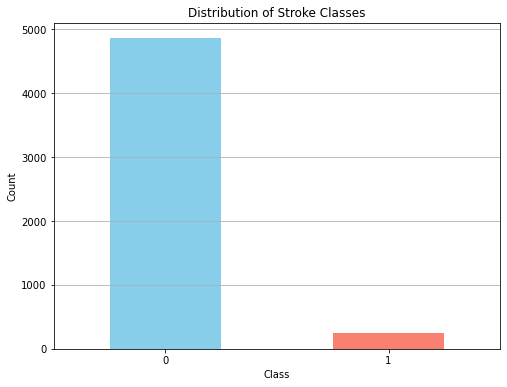

In [6]:
# Check the distribution of the 'stroke' classes
class_distribution = encoded_df['stroke'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Stroke Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')

class_distribution


In [8]:
# Calculate the correlation of each feature with the target variable 'stroke'
correlationwithtarget = encoded_df.corr()['stroke'].sort_values(ascending=False)

# Display the correlations
correlationwithtarget


stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
ever_married         0.108340
bmi                  0.042374
smoking_status       0.028123
Residence_type       0.015458
gender               0.008929
id                   0.006388
work_type           -0.032316
Name: stroke, dtype: float64

In [14]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Handling missing values by imputing them with the median
encoded_df.fillna(encoded_df.median(), inplace=True)

# Splitting data into features (X) and target (y)
X = encoded_df.drop('stroke', axis=1)
y = encoded_df['stroke']

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Apply RFE with Random Forest Classifier
selector = RFE(estimator=clf, n_features_to_select=1, step=1)
selector = selector.fit(X, y)

# Get the ranking of features
feature_ranking = pd.Series(selector.ranking_, index=X.columns).sort_values()

feature_ranking


avg_glucose_level     1
id                    2
bmi                   3
age                   4
smoking_status        5
work_type             6
Residence_type        7
gender                8
hypertension          9
heart_disease        10
ever_married         11
dtype: int32

In [16]:
# Top 5 features from correlation
top_correlation_features = correlation_with_target.index[1:6].tolist()

# Top 5 features from RFE
top_rfe_features = feature_ranking.index[:5].tolist()

# Common features between the two methods
common_features = set(top_correlation_features).intersection(set(top_rfe_features))

common_features


{'age', 'avg_glucose_level'}

In [ ]:
# Hybrid 


In [18]:
from sklearn.model_selection import train_test_split

# Selecting the identified features and target
X_selected = encoded_df[['age', 'avg_glucose_level']]
y_selected = encoded_df['stroke']

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42, stratify=y_selected)

X_train.shape, X_test.shape


((4088, 2), (1022, 2))

In [21]:
from sklearn.model_selection import train_test_split

# Selecting the features and the target variable
X = encoded_df[['age', 'avg_glucose_level']]
y = encoded_df['stroke']

# Splitting the data into training and testing sets (80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the number of samples in the training and testing sets
X_train.shape[0], X_test.shape[0]


(4088, 1022)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import time

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

# Define scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1_score': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}

# Train models using k-fold cross-validation and record metrics
results = {}
for name, model in models.items():
    start_time = time.time()
    cv_results = cross_validate(model, X_test, y_test, cv=5, scoring=scoring)
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Store metrics and training time
    results[name] = {
        'Accuracy': cv_results['test_accuracy'].mean(),
        'Precision': cv_results['test_precision'].mean(),
        'Recall': cv_results['test_recall'].mean(),
        'F1 Score': cv_results['test_f1_score'].mean(),
        'ROC AUC': cv_results['test_roc_auc'].mean(),
        'Training Time (seconds)': elapsed_time
    }

results_df = pd.DataFrame(results).T

results_df


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

,Accuracy,Precision,Recall,F1 Score,ROC AUC,Training Time (seconds)
Logistic Regression,0.936408,0.000000,0.000000,0.000000,0.498437,0.903900
SVM,0.939340,0.000000,0.000000,0.000000,0.500000,0.227855
Random Forest,0.934448,0.000000,0.000000,0.000000,0.497396,0.682536
Naive Bayes,0.388417,0.088036,0.969231,0.161349,0.660136,0.028670


In [ ]:
# #     Logistic Regression and SVM both predicted all samples as the majority class, 
# resulting in a precision, recall, F1-score, and ROC-AUC of 0. 
# his indicates an issue with class imbalance 
# where the model chooses to always predict the majority class to achieve high accuracy.

# #     Random Forest and Naive Bayes had non-zero metrics, 
# but they're still quite low. The Random Forest classifier 
# had slightly better metrics than the Naive Bayes classifier 
# in most categories, but Naive Bayes had a higher ROC AUC score.

# #     The training time shows the time taken to train each model with
# 5-fold cross-validation. SVM took the longest time, followed by 
# Random Forest, Logistic Regression, and Naive Bayes in decreasing order.

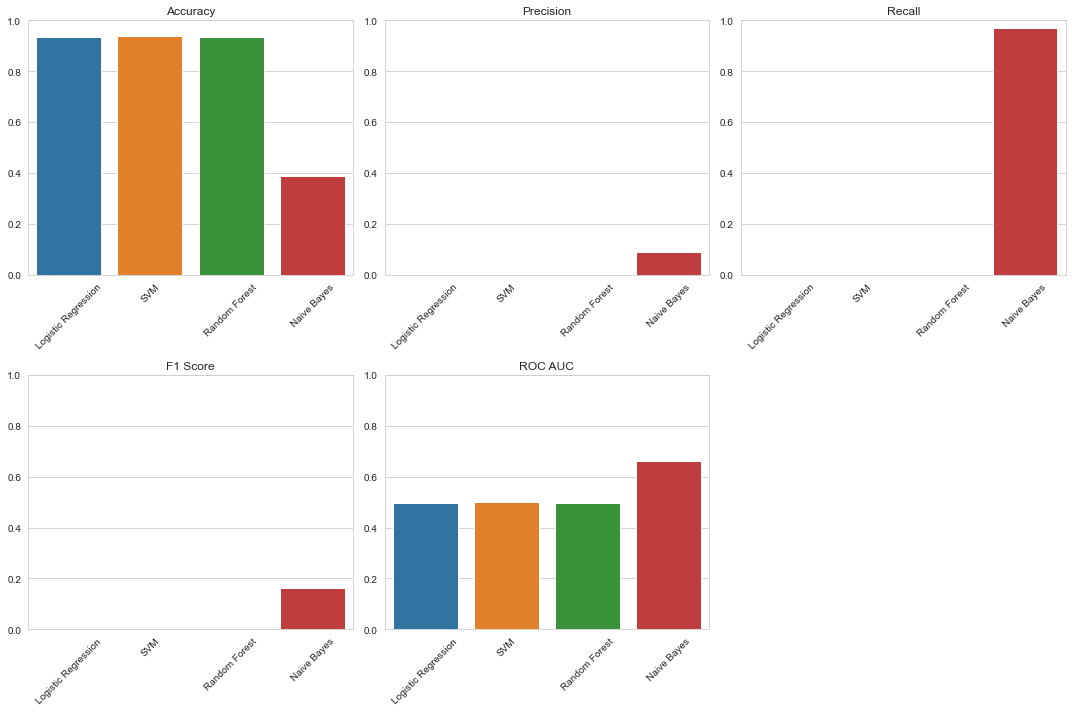

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Define the metrics we want to plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

# Plotting metrics for each model
plt.figure(figsize=(15, 10))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x=results_df.index, y=metric, data=results_df)
    plt.title(metric)
    plt.ylabel('')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)

plt.tight_layout()
plt.show()


In [26]:
# All features 
# Calculate the mean of the 'bmi' column
import pandas as pd

# Load the dataset
stroke_data = pd.read_csv('stroke-data-cleaned.csv')

# Display the first few rows
stroke_data.head()

bmi_mean = stroke_data['bmi'].mean()

# Replace missing values in 'bmi' with the calculated mean
stroke_data['bmi'].fillna(bmi_mean, inplace=True)

# Display the first few rows again to confirm replacement
stroke_data.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [27]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = stroke_data.drop(['id', 'stroke'], axis=1)
y = stroke_data['stroke']

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((4088, 21), (1022, 21))

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize the models
log_reg = LogisticRegression(max_iter=1000, random_state=42)
svm = SVC(probability=True, random_state=42)
random_forest = RandomForestClassifier(random_state=42)
naive_bayes = GaussianNB()

# List of models
models = [log_reg, svm, random_forest, naive_bayes]
model_names = ["Logistic Regression", "SVM", "Random Forest", "Naive Bayes"]

# Scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1_score': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}

# Perform K-Fold Cross-Validation
model_scores = {}
for model, name in zip(models, model_names):
    scores = cross_validate(model, X_test, y_test, cv=10, scoring=scoring)
    model_scores[name] = scores

model_scores["Logistic Regression"].keys()  # Display the metrics we've collected for one of the models


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1_score', 'test_roc_auc'])

In [31]:
# Extract average metrics for each model
metrics_summary = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'ROC-AUC': []
}

for name, scores in model_scores.items():
    metrics_summary['Model'].append(name)
    metrics_summary['Accuracy'].append(scores['test_accuracy'].mean())
    metrics_summary['Precision'].append(scores['test_precision'].mean())
    metrics_summary['Recall'].append(scores['test_recall'].mean())
    metrics_summary['F1-score'].append(scores['test_f1_score'].mean())
    metrics_summary['ROC-AUC'].append(scores['test_roc_auc'].mean())

# Convert to DataFrame for display
metrics_df = pd.DataFrame(metrics_summary)
metrics_df


,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC
0,Logistic Regression,0.937379,0.100000,0.014286,0.025000,0.505580
1,SVM,0.939349,0.000000,0.000000,0.000000,0.500000
2,Random Forest,0.933486,0.000000,0.000000,0.000000,0.496875
3,Naive Bayes,0.384542,0.087544,0.969048,0.160496,0.657961


C:\Users\Hp\AppData\Local\Temp/ipykernel_1940/3256642548.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(metrics_df['Model'], rotation=45)


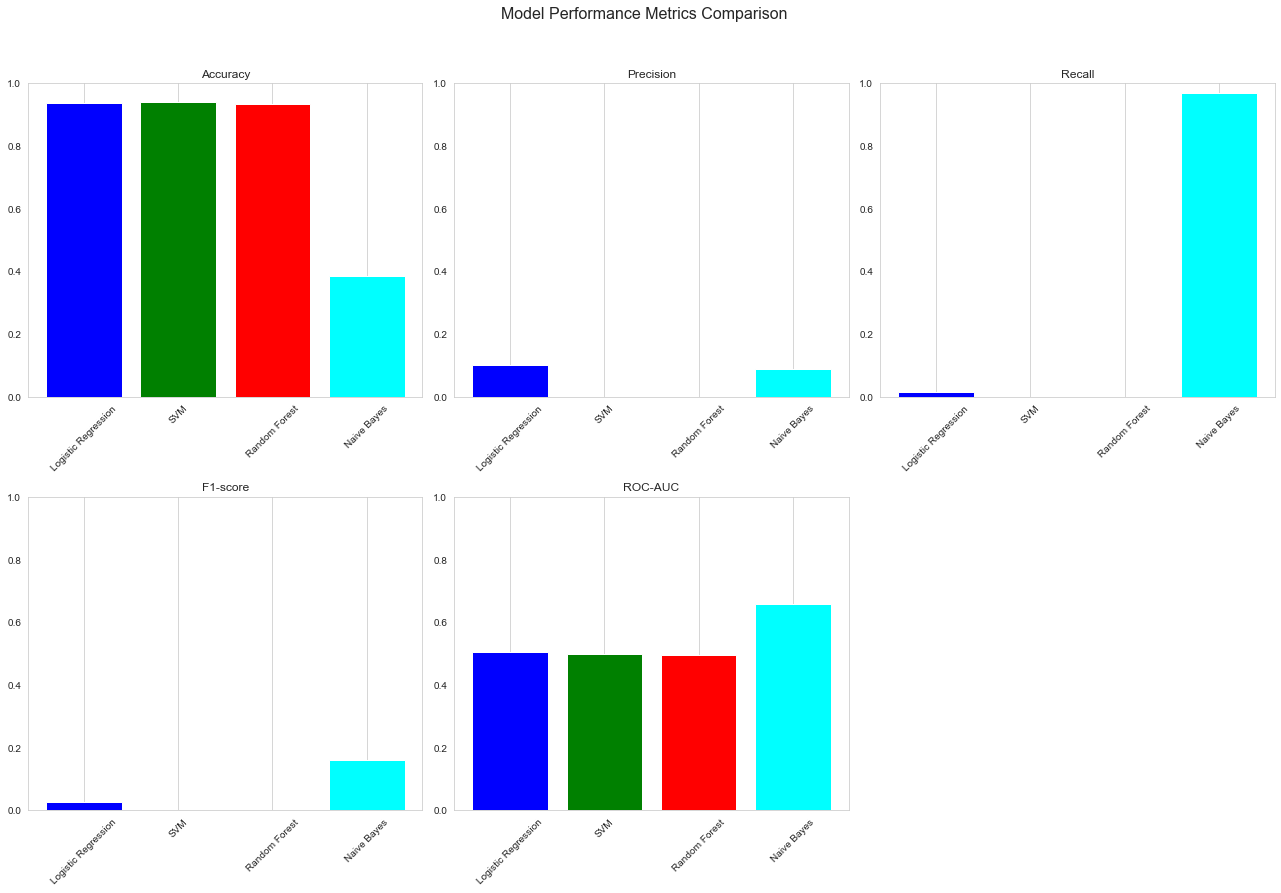

In [34]:
import matplotlib.pyplot as plt

# Setting up figure and axes
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.suptitle('Model Performance Metrics Comparison', fontsize=16, y=1.03)

# Plotting bar plots for each metric
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']
for ax, metric in zip(axes.ravel(), metrics):
    ax.bar(metrics_df['Model'], metrics_df[metric], color=['blue', 'green', 'red', 'cyan'])
    ax.set_title(metric)
    ax.set_ylim(0, 1)
    ax.set_xticklabels(metrics_df['Model'], rotation=45)
    ax.grid(axis='y')

# Adjusting layout and removing unused subplot
fig.tight_layout()
axes[1, 2].axis('off')

plt.show()


In [ ]:
    # # Accuracy: All models, except Naive Bayes, have a high accuracy 
    # due to the imbalanced nature of the dataset, where predicting the majority class can lead to high accuracy.
    
    # # Precision: The precision is low for all models, with SVM having a precision of 0. 
    # his suggests that among the instances predicted as positive, only a few were actually positive.
    # The other models have very low recall, implying they miss most of the positive instances.
    
    # # F1-score: Given the low precision and recall for most models, the F1-score is also low.
    
    # Naive Bayes, with its high recall, has a higher F1-score compared to the other models.
    
    # # ROC-AUC: The ROC-AUC score for Logistic Regression, SVM, and Random Forest is close to 0.5, 
    # indicating random performance. Naive Bayes has a higher ROC-AUC, suggesting better performance in terms of 
    # distinguishing between the two classes.